# Lab 1 - Financial Mathematics

Jakub Grunas

In [1]:
import numpy as np
from matplotlib import pyplot as plt 

## Ex 1
Generate random numbers from U(0,1)

In [2]:
m = 2**35
a1 = np.floor(np.pi * 10**9)
a0 = np.floor(np.e * 10**9)

def generate_0_1(seed):
    xi = ((a1*seed+a0) % m)
    u = xi / (m-1)
    return u,xi

In [3]:
numbers = []
xi = 123
for i in range(1000000):
    ui, xi = generate_0_1(xi)
    numbers.append(ui)

<function matplotlib.pyplot.show(close=None, block=None)>

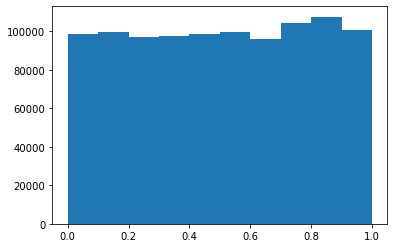

In [4]:
plt.hist(numbers)
plt.show

## Ex 2
Generate random numbers from distribution with given pdf using (modified) elimination method

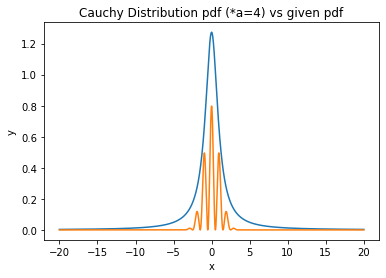

In [5]:
def f(x):
    return (1 + np.cos(2*np.pi*x)) / (1 + np.exp(-2*np.pi**2)) * np.exp(-x**2/2) / np.sqrt(2*np.pi)

# Cauchy(0,1)
def g(x): 
    return 1 / (np.pi * (1 + x**2))

# F^(-1) Cauchy(0,1)
def F_inv(u):
    return np.tan(np.pi*(u - 0.5))

x = np.linspace(-20, 20, 2000)
y1 = 4 * g(x) # znaleziona stała a=4, że ag(x)>f(x)
y2 = f(x)

plt.plot(x, y1)
plt.plot(x,y2)
plt.title("Cauchy Distribution pdf (*a=4) vs given pdf")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
seed1 = 42
seed2 = 123
numbers = []

for i in range(100000):
    u1, seed1 = generate_0_1(seed1)
    u2, seed2 = generate_0_1(seed2)
    X = F_inv(u1)
    Y = u2

    while Y > f(X) / (4 * g(X)):
        u1, seed1 = generate_0_1(seed1)
        u2, seed2 = generate_0_1(seed2)
        X = F_inv(((a1*seed1+a0) % m) / (m-1))
        Y = ((a1*seed2+a0) % m) / (m-1)
        
    numbers.append(X)

Text(0.5, 1.0, 'pdf vs histogram of generated random variables')

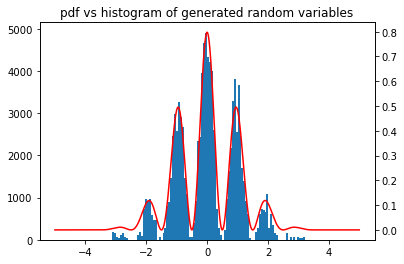

In [7]:
x = np.linspace(-5, 5, 2000)
y = f(x)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist(numbers, bins=100)
ax2.plot(x,y, color='red')
plt.title("pdf vs histogram of generated random variables")

## Ex 3
Generate random variables from Poisson distribution

### from cdf

(array([  89.,  546., 1569., 3518., 2096., 1330.,  693.,  122.,   25.,
          12.]),
 array([ 2. ,  4.3,  6.6,  8.9, 11.2, 13.5, 15.8, 18.1, 20.4, 22.7, 25. ]),
 <BarContainer object of 10 artists>)

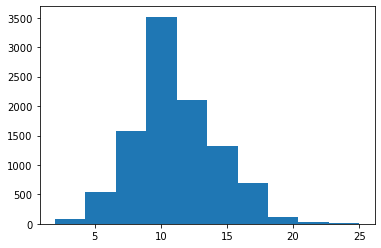

In [8]:
import math
import random

def prob(lamb, k):
    return (lamb ** k) * math.exp(-lamb) / math.factorial(k)

numbers = []
seed=123
x=seed

lamb = 10
for i in range(10000):
    u, x = generate_0_1(x)
    j = 1
    q = 0

    while u > q:
        q += prob(lamb, j)
        j += 1

    numbers.append(j)
    
plt.hist(numbers)

### from Poisson process

(array([ 137.,  393., 2306., 1582., 2919.,  894., 1232.,  250.,  257.,
          30.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

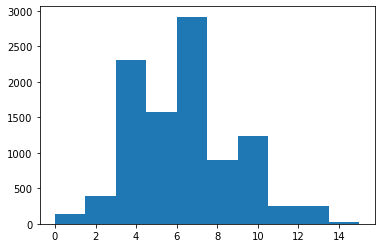

In [9]:
numbers = []
seed=123
x=seed
lamb=6

for i in range(10000):
    
    t = 0
    N = 0
    
    while True:
        u, x = generate_0_1(x)
        t -= np.log(u) / lamb
        if t > 1:
            break
        N += 1
    numbers.append(N)

plt.hist(numbers)

## Zadanie 4
Generate random numbers from given distibution

In [10]:
def F_n(x):
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0

def F_b(n, p, k):
    if k < 0:
        return 0
    else:
        cdf = 0
        for i in range(math.floor(k)+1):
            coeff = 1
            for j in range(1, i+1):
                coeff *= (n-j+1) / j
            cdf += coeff * p**i * (1-p)**(n-i)
        return cdf
    
def F_exp(lamb, x):
    if x < 0:
        return 0
    else:
        return 1 - math.exp(-lamb * x)
    
def F(x):
    return 1/3 * (F_b(10, 1/3, x) + F_n(x) + F_exp(1, x))

In [11]:
def empirical_cdf(data):
    sorted_data = sorted(data)
    unique_data = []
    counts = []
    prev_value = None
    for value in sorted_data:
        if value == prev_value:
            counts[-1] += 1
        else:
            unique_data.append(value)
            counts.append(1)
            prev_value = value

    cum_counts = [counts[0]]
    for count in counts[1:]:
        cum_counts.append(cum_counts[-1] + count)

    n = len(sorted_data)
    cdf = [count / n for count in cum_counts]

    return unique_data, cdf

In [12]:
from scipy.stats import norm, binom, expon

seed1 = 42
seed2 = 123

numbers = []
for i in range(100000):
    u1, seed1 = generate_0_1(seed1)
    if u1 < 1/3:
        u2, seed2 = generate_0_1(seed2)
        number = norm.ppf(u2)
        numbers.append(number)
    elif u1 < 2/3:
        u2, seed2 = generate_0_1(seed2)
        number = binom.ppf(u2, 10, 1/3)
        numbers.append(number)
    else:
        u2, seed2 = generate_0_1(seed2)
        number = expon.ppf(u2, 1)
        numbers.append(number)


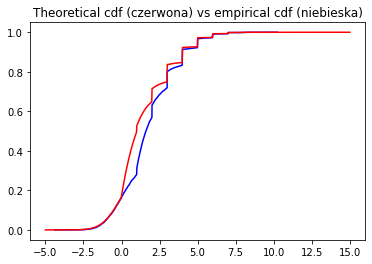

In [13]:
x1, y1 = empirical_cdf(numbers)
plt.plot(x1, y1, color = 'blue')

x2 = np.linspace(-5,15,1000)
y2 = [F(x0) for x0 in x2]
plt.plot(x2,y2, color='red')

plt.title('Theoretical cdf (czerwona) vs empirical cdf (niebieska)')
plt.show()


## Zadanie 5
Implement RNG in cython

In [14]:
# pip install cython
%load_ext cython

In [15]:
%%cython

cdef unsigned int x = 123456789, y = 987654321, z = 43219876, c = 6543217

cdef unsigned int JKISS():
    cdef unsigned long long t
    global x, y, z, c
    x = 314527869 * x + 1234567
    y ^= y << 5
    y ^= y >> 7
    y ^= y << 22
    t = 4294584393ULL * z + c
    c = t >> 32
    z = t
    return x + y + z

def random_cython():
    x = JKISS() / 4294967296
    return x

In [16]:
import random
import time
randoms_cython = [None] * 1000000
randoms_linear = [None] * 1000000
randoms_python = [None] * 1000000

start_time = time.time()
for i in range(1000000):
    randoms_cython[i] = random_cython()
end_time = time.time()

print(f'Time of generating a million random numbers in cython: {end_time-start_time}')
    
xi=123
start_time = time.time()
for i in range(1000000):
    u1, xi = generate_0_1(xi)
    randoms_linear[i] = ui
end_time = time.time()
    
print(f'Time of generating a million random numbers with own implementation: {end_time-start_time}')

start_time = time.time()  
for i in range(1000000):
    randoms_python[i] = random.random()
end_time = time.time()

print(f'Time of generating a million random numbers in python: {end_time-start_time}')


Time of generating a million random numbers in cython: 0.3513948917388916
Time of generating a million random numbers with own implementation: 1.9461922645568848
Time of generating a million random numbers in python: 0.20476508140563965
